In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Fit function returns a function by which we can then transform our Input Data

In [98]:
def fit(X): 
    '''
    Stores mean and std in closure for future input values, to check mean and std
    transform.__closures__.content_cells[0], transform.__closures__.content_cells[1]
    '''
    u = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    def transform(test_X, implace=False): 
        '''
        Transforms input data with standard feature scaling, 
        implace = False by default that means it will return transformed data 
        else it will store.
        '''
        result = (test_X - u)/std
        if implace: 
            test_X = result
        return result
    return transform

### Cost Function

In [36]:
def cost(X, Y, m): 
    cost, M = 0, X.shape[0]
    for rowIndex, row in enumerate(X): 
        cost += (1/M)*(Y[rowIndex] - (m*row).sum())**2
    return cost

In [37]:
def step_gd(X, Y, m, lr = 0.001): 
    M = X.shape[0]
    m_slopes = np.zeros(X.shape[1])
    for rowIndex, row in enumerate(X): 
        temp = Y[rowIndex] - (m*row).sum()
        for i in range(X.shape[1]): 
            m_slopes[i] += temp*(-2*row[i])/M
    return m - lr*m_slopes


In [100]:
def gd(X, Y, iterations=10, lr = 0.01, verbose=True): 
    m = np.zeros(X.shape[1])
    for _ in range(iterations): 
        m = step_gd(X, Y, m, lr)
        if verbose: 
            print(f"Cost: {cost(X, Y, m)}")        
    return m
    

In [101]:
from sklearn.datasets import load_boston

In [124]:
#Loading Boston Dataset
boston = load_boston()
X = boston.data
Y = boston.target
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [125]:
#Scaling Feature for better results. 
transform = fit(X)
X = transform(X)
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [132]:
#Calling our gradient descent function
m = gd(X, Y, 10, .15, verbose=True)

Cost: 307.19859783475215
Cost: 166.92644860642204
Cost: 97.17324160636382
Cost: 62.067599984820234
Cost: 44.13042841592127
Cost: 34.78521857475461
Cost: 29.792804200568437
Cost: 27.040141933305915
Cost: 25.463044235749877
Cost: 24.518509197801293


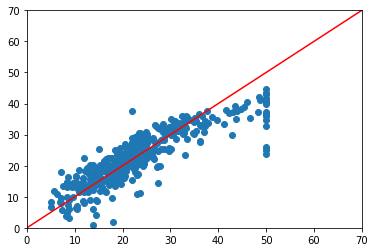

In [91]:
plt.scatter(Y, np.dot(X, m))
plt.axis([0, Y.max()+20, 0, Y.max()+20])
plt.plot([0, Y.max()+20], [0, Y.max()+20], color="red")

**Comparing Our Linear Regression with SKlearn Linear Regression**

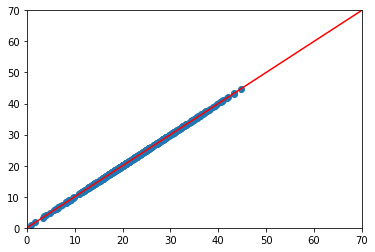

In [90]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X, Y)
coef = alg1.coef_
coef[0] = alg1.intercept_
plt.scatter(np.dot(X, m), np.dot(X, coef))
plt.axis([0, Y.max()+20, 0, Y.max()+20])
plt.plot([0, Y.max()+20], [0, Y.max()+20], color="red")

### Optimising Code Using Numpy Features. 

In [103]:
def predict(X, m): 
    return np.dot(X, m)

In [104]:
def cost_np(X, Y, m): 
    M = X.shape[0]
    Y_ = predict(X, m)
    return (((Y-Y_)**2).sum())/M


In [129]:
def gradient(X, Y, m): 
    M = X.shape[0]
    Y_ = predict(X, m)
    temp = (Y-Y_)
    return (-2/M)* np.dot(X.T, temp )

In [127]:
def gradient_descent(X, Y, lr = 0.1, max_iter = 300, verbose = True): 
    m = np.zeros((X.shape[1], ))
    for _ in range(max_iter): 
        grad = gradient(X, Y, m)
        m = m - lr*grad
        if verbose: 
            print(cost_np(X, Y, m))
    return m

In [149]:
import time
start_np = time.time()
m = gradient_descent(X, Y, 0.15, 1000000, verbose=False)
end_np = time.time()
start_iterative = time.time()
m = gd(X, Y, 1000, 0.15, verbose=False)
end_iterative = time.time()
print(f"Time Taken By Numpy Methods: {end_np-start_np}")
print(f"Time Taken By Iterative Methods: {end_iterative-start_iterative}")

Time Taken By Numpy Methods: 7.028745889663696
Time Taken By Iterative Methods: 7.1384618282318115


### SKLearn Implementation

In [153]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(X, Y)
print(alg1.coef_)
print(alg1.intercept_)

[ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]
22.532806324110684


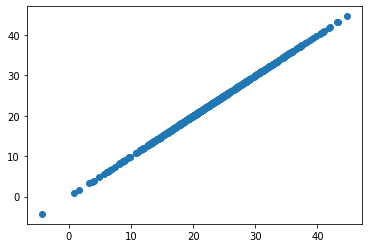

In [158]:
# Comparing it with our hypothesis found by iterative method
plt.scatter(np.dot(X, m), alg.predict(X)) 